# **1.1 Importing** **Libraries**




In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/content/heart_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **2.1 Import Dataset**

In [5]:
data = pd.read_csv('/content/heart_data.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (297, 14)



> **2.2 Data Dictionary**

1) age: age in years
       
2)gender: gender
1 = male,   0 = female

3) chest_pain: chest pain type
   Value 0: typical angina
   Value 1: atypical angina
   Value 2: non-anginal pain
   Value 3: asymptomatic

4) rest_bp: resting blood pressure (in mm  
   Hg on admission to the hospital)

5) cholesterol: serum cholestoral in mg/dl

6) fasting_bs: (fasting blood sugar >       120mg/dl)
1 = true;
0 = false

7) rest_ecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8) max_hr: maximum heart rate achieved

9) exercise_angina: exercise induced angina
1 = yes
0 = no

10) st_depression = ST depression induced by exercise relative to rest

11) st_slope: the slope of the peak exercise ST segment
Value 0: upsloping
Value 1: flat
Value 2: downsloping

12) num_vessel: number of major vessels (0-3) colored by flourosopy

13) thalassemia:
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect

14) diagnosis (the lable):
0 = no disease,
1 = disease

In [6]:
data.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [7]:
data.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

In [8]:
data.tail()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
292,130,2,2,62,0,97,0,0,1,263,1.2,0,1,1
293,100,3,0,58,0,122,0,0,1,248,1.0,2,0,0
294,138,3,0,59,0,182,0,1,0,271,0.0,2,0,0
295,130,3,2,56,1,103,1,1,2,283,1.6,2,0,1
296,150,3,2,50,0,128,0,1,1,243,2.6,2,0,1


In [9]:
data.dtypes

rest_bp              int64
chest_pain           int64
thalassemia          int64
age                  int64
fasting_bs           int64
max_hr               int64
exercise_angina      int64
gender               int64
st_slope             int64
cholesterol          int64
st_depression      float64
rest_ecg             int64
num_vessels          int64
diagnosis            int64
dtype: object

Data Cleaning

In [10]:
#Check Null Value
data.isnull().sum()

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

# **3.1 Data** **Visualisation & Analysis:**

In [11]:
#linnear regression

import statsmodels.api as sm
X = data[['age', 'rest_bp', 'cholesterol', 'max_hr', 'st_depression']]
y = data['diagnosis']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     22.25
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           6.94e-19
Time:                        06:31:44   Log-Likelihood:                -166.59
No. Observations:                 297   AIC:                             345.2
Df Residuals:                     291   BIC:                             367.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9065      0.322      2.815

Statistical summary of the numerical features

*   Age :

1.   The average age in the dataset is 54.5 years
2.   The oldest is 77 years, whereas the youngest is 29 years old

*   Cholesterol:

1. The average registered cholestrol level is 247.15
2. Maximum level is 564 and the minimum level is 126.
3. Note: According to [6], a healthy cholesterol level is <200mg/dl
 and usually high level of cholesterol is associated with heart disease.

*   Resting blood pressure:
1. 131 mean, 200 max and 94 min

*   Max heart rate achieved:
1. The abverage max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.

*   St_depression:
1. The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.

*   Number of major blood vessels:
1. A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.
















In [ ]:
#Statistical summary
data.describe()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,131.693603,2.158249,0.835017,54.542088,0.144781,149.599327,0.326599,0.676768,0.602694,247.350168,1.055556,0.996633,0.676768,0.461279
std,17.762806,0.964859,0.956690,9.049736,0.352474,22.941562,0.469761,0.468500,0.618187,51.997583,1.166123,0.994914,0.938965,0.499340
min,94.000000,0.000000,0.000000,29.000000,0.000000,71.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,2.000000,0.000000,48.000000,0.000000,133.000000,0.000000,0.000000,0.000000,211.000000,0.000000,0.000000,0.000000,0.000000
50%,130.000000,2.000000,0.000000,56.000000,0.000000,153.000000,0.000000,1.000000,1.000000,243.000000,0.800000,1.000000,0.000000,0.000000
75%,140.000000,3.000000,2.000000,61.000000,0.000000,166.000000,1.000000,1.000000,1.000000,276.000000,1.600000,2.000000,1.000000,1.000000
max,200.000000,3.000000,2.000000,77.000000,1.000000,202.000000,1.000000,1.000000,2.000000,564.000000,6.200000,2.000000,3.000000,1.000000


In [ ]:
Target_0_data = data[data["diagnosis"]==0]
Target_0_data = pd.DataFrame(Target_0_data)
Target_1_data = data[data["diagnosis"]==1]
Target_1_data = pd.DataFrame(Target_1_data)
print("The shape of data when target is '0': Not disease",Target_0_data.shape)
print("The shape of data when target is '1': Disease",Target_1_data.shape)

The shape of data when target is '0': Not disease (160, 14)
The shape of data when target is '1': Disease (137, 14)


**Target distribution**

We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

Text(0.5, 1.0, 'Diagnosis variable distribution')

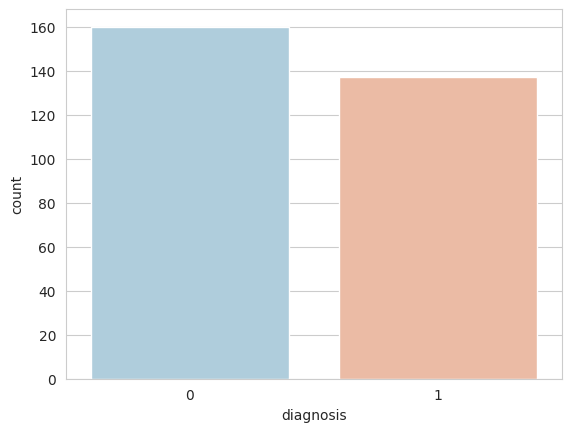

In [ ]:
#Diagnosis Variable distribution
sns.set_style('whitegrid')
sns.countplot(x= 'diagnosis', data=data, palette='RdBu_r')
ax.set_title('Diagnosis variable distribution',)

From the above graph we can derive that there are 160 people with no heart diseases and 137 people with heart disease therefore , The data is balanced

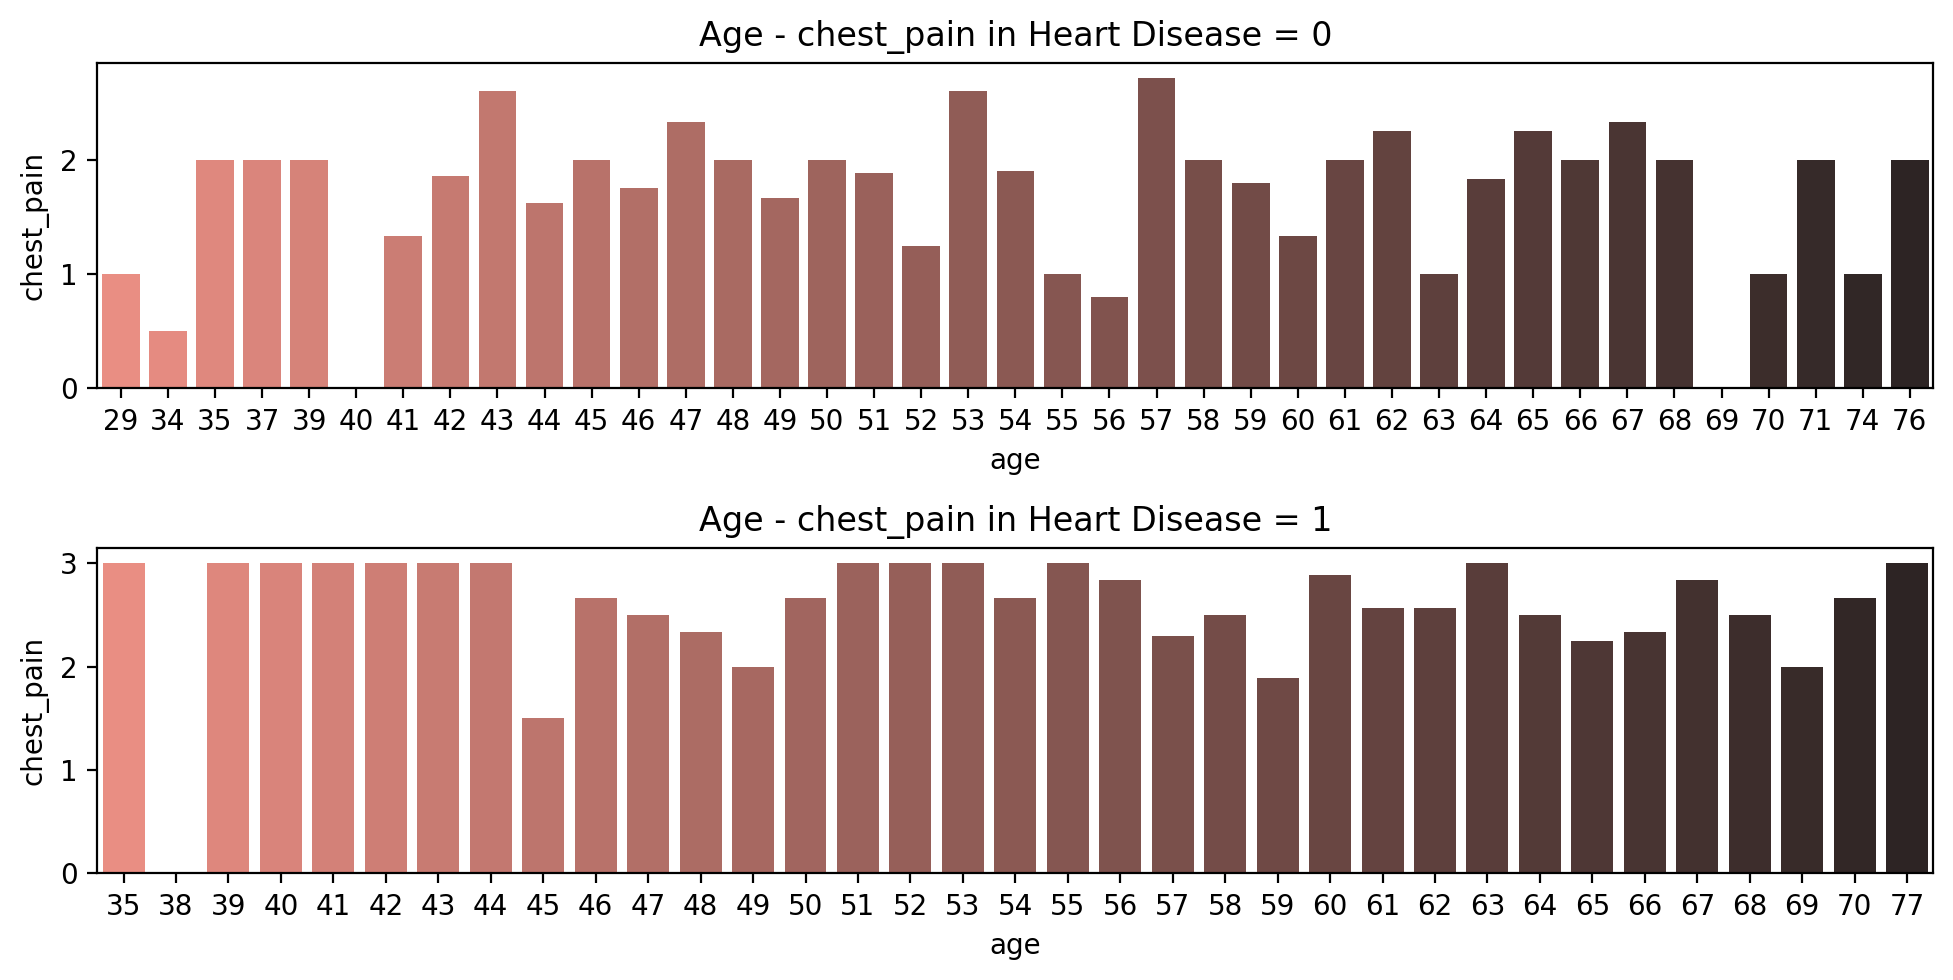

In [ ]:
#Age - chest_pain in Heart Disease = 0
#Age - chest_pain in Heart Disease = 1
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['chest_pain'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - chest_pain in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['chest_pain'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - chest_pain in Heart Disease = 1')


plt.tight_layout()

As you can see, there are 2 Bar charts of people either suffering and not suffering from heart diseases.





1. In the upper Bar Chart, you can find out age-wise people not suffering from heart disease and average of chest pain.
2.
In the lower Bar Chart, you can find out age-wise people suffering from heart disease and average of chest pain.




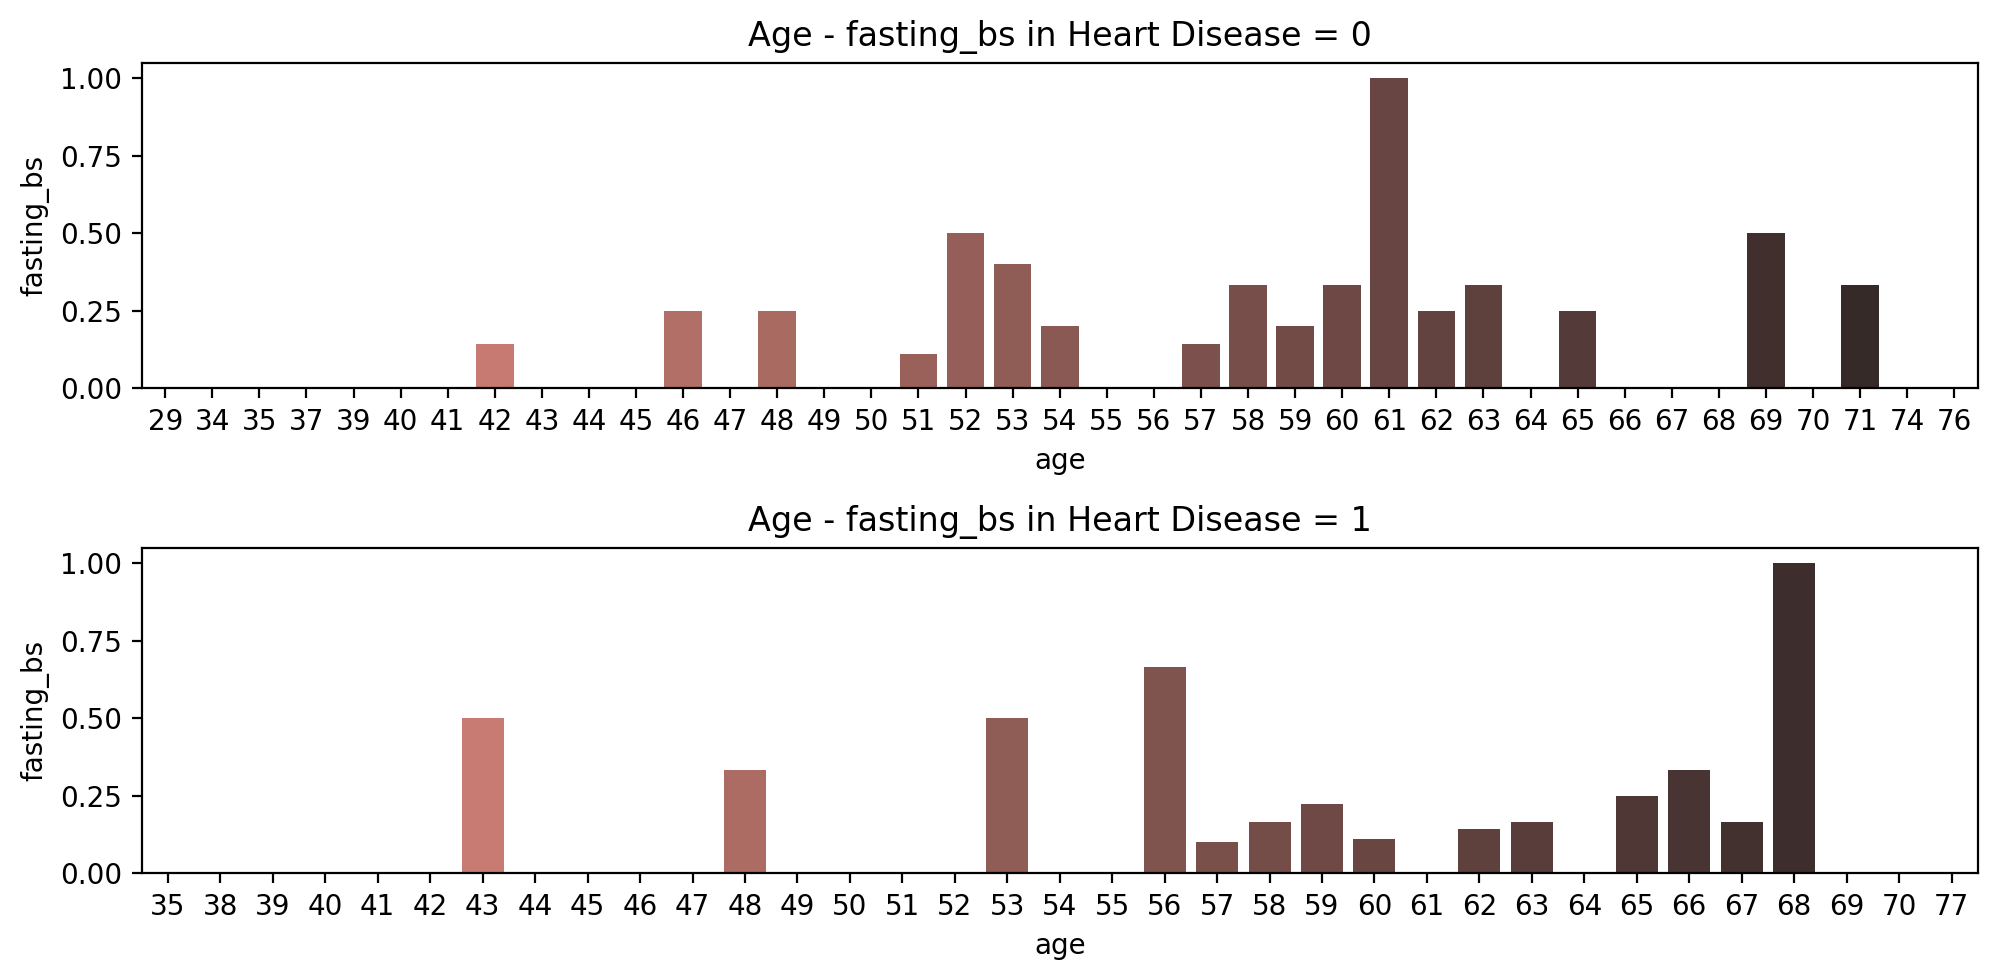

In [ ]:
#Age - fasting_bs in Heart Disease = 0
#Age - fasting_bs in Heart Disease = 1
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['fasting_bs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - fasting_bs in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['fasting_bs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - fasting_bs in Heart Disease = 1')


plt.tight_layout()

As you can see, there are 2 Bar charts of age-wise people suffering from fast blood sugar which is greater than 120ms (TRUE) and their average.






1.   In the upper Bar Chart, you can find out age-wise people suffering from Fasting blood sugar but not heart disease and average of it
2.   In the lower Bar Chart, you can find out age-wise people suffering from heart disease as well as Fasting blood sugar and average of it.





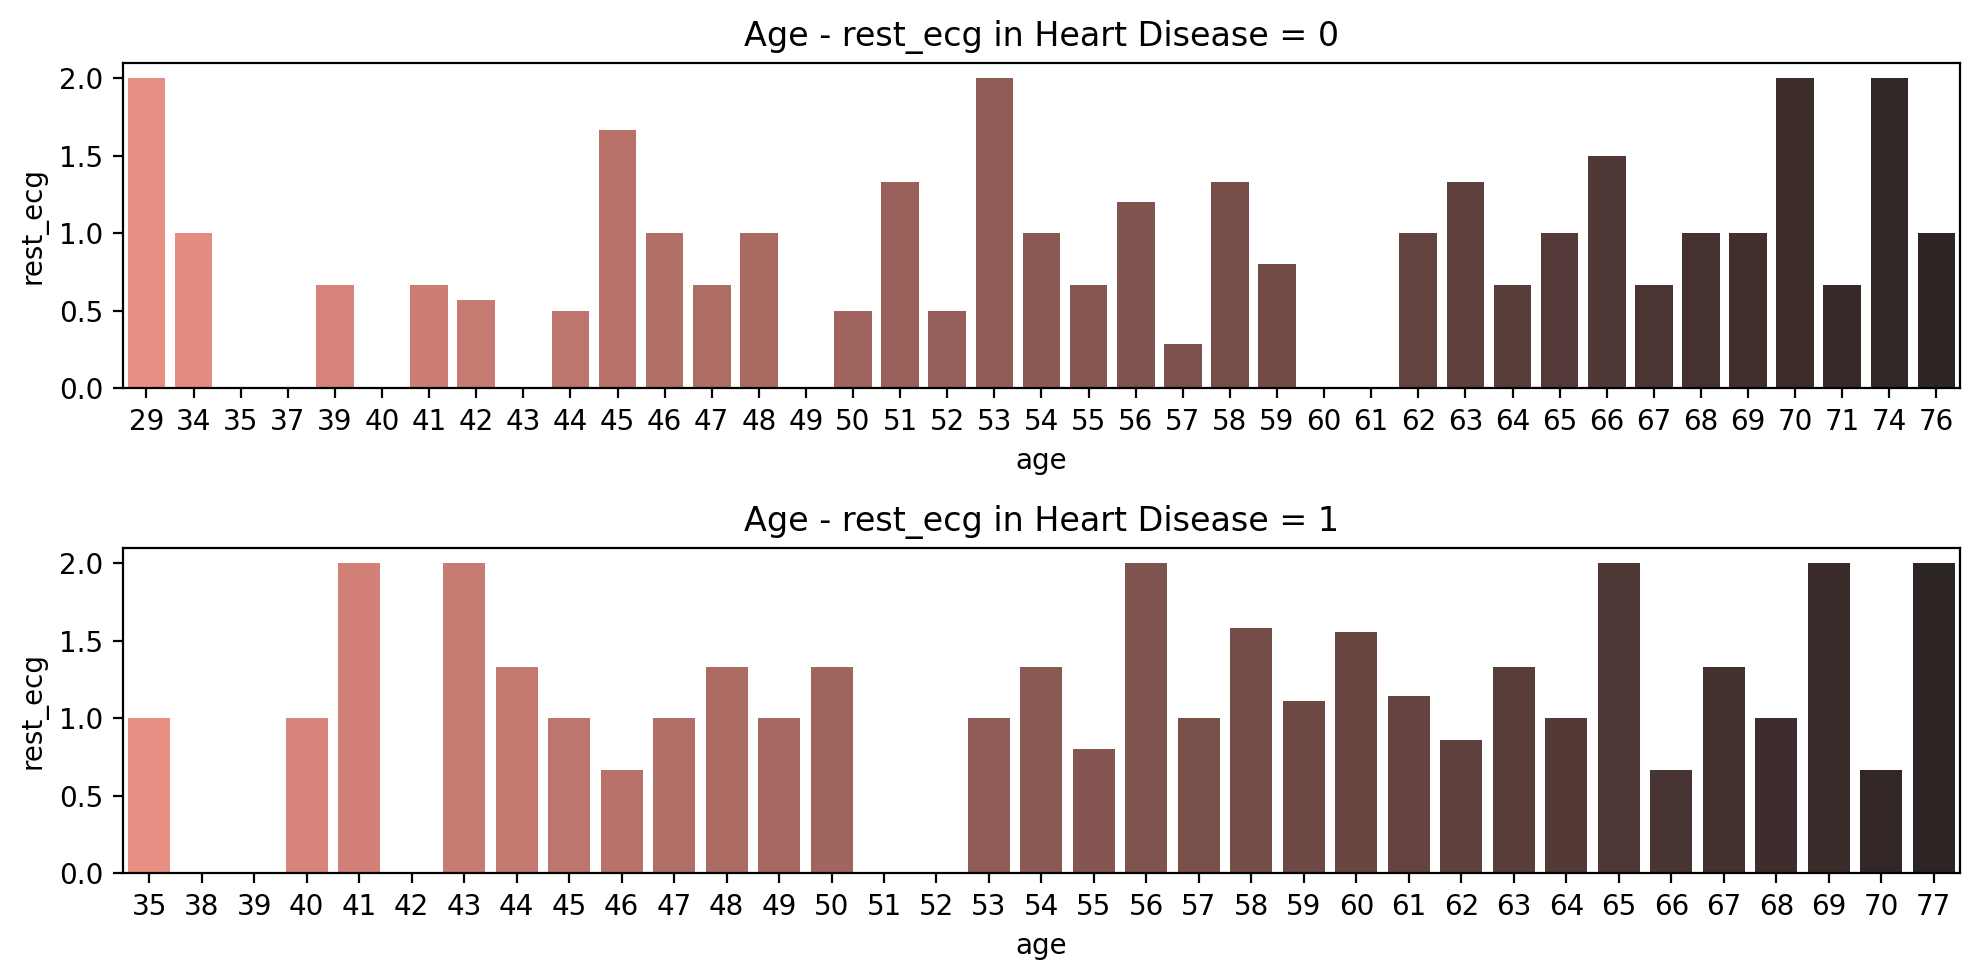

In [ ]:
#Age - rest_ecg in Heart Disease = 0
#Age - rest_ecg in Heart Disease = 1
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['rest_ecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - rest_ecg in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['rest_ecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - rest_ecg in Heart Disease = 1')


plt.tight_layout()

As you can see, there are 2 Bar charts of age-wise people suffering from resting electrocardiographic (0) and their average.

In the upper Bar Chart, you can find out age-wise people suffering from resting electrocardiographic but not heart disease and average of it
In the lower Bar Chart, you can find out age-wise people suffering from heart disease as well as resting electrocardiographic and average of it.

In [ ]:
data['gender'][data['gender'] == 0] = 'female'
data['gender'][data['gender'] == 1] = 'male'

data['chest_pain'][data['chest_pain'] == 0] = 'typical angina'
data['chest_pain'][data['chest_pain'] == 1] = 'atypical angina'
data['chest_pain'][data['chest_pain'] == 2] = 'non-anginal pain'
data['chest_pain'][data['chest_pain'] == 3] = 'asymptomatic'

data['fasting_bs'][data['fasting_bs'] == 0] = 'lower than 120mg/ml'
data['fasting_bs'][data['fasting_bs'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_angina'][data['exercise_angina'] == 0] = 'no'
data['exercise_angina'][data['exercise_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [ ]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'rest_bp', 'max_hr', 'st_depression', 'num_vessels']
# categorical (binary)
bin_feats = ['gender', 'fasting_bs', 'exercise_angina', 'diagnosis']
# caterorical (multi-)
nom_feats= ['chest_pain', 'rest_ecg', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

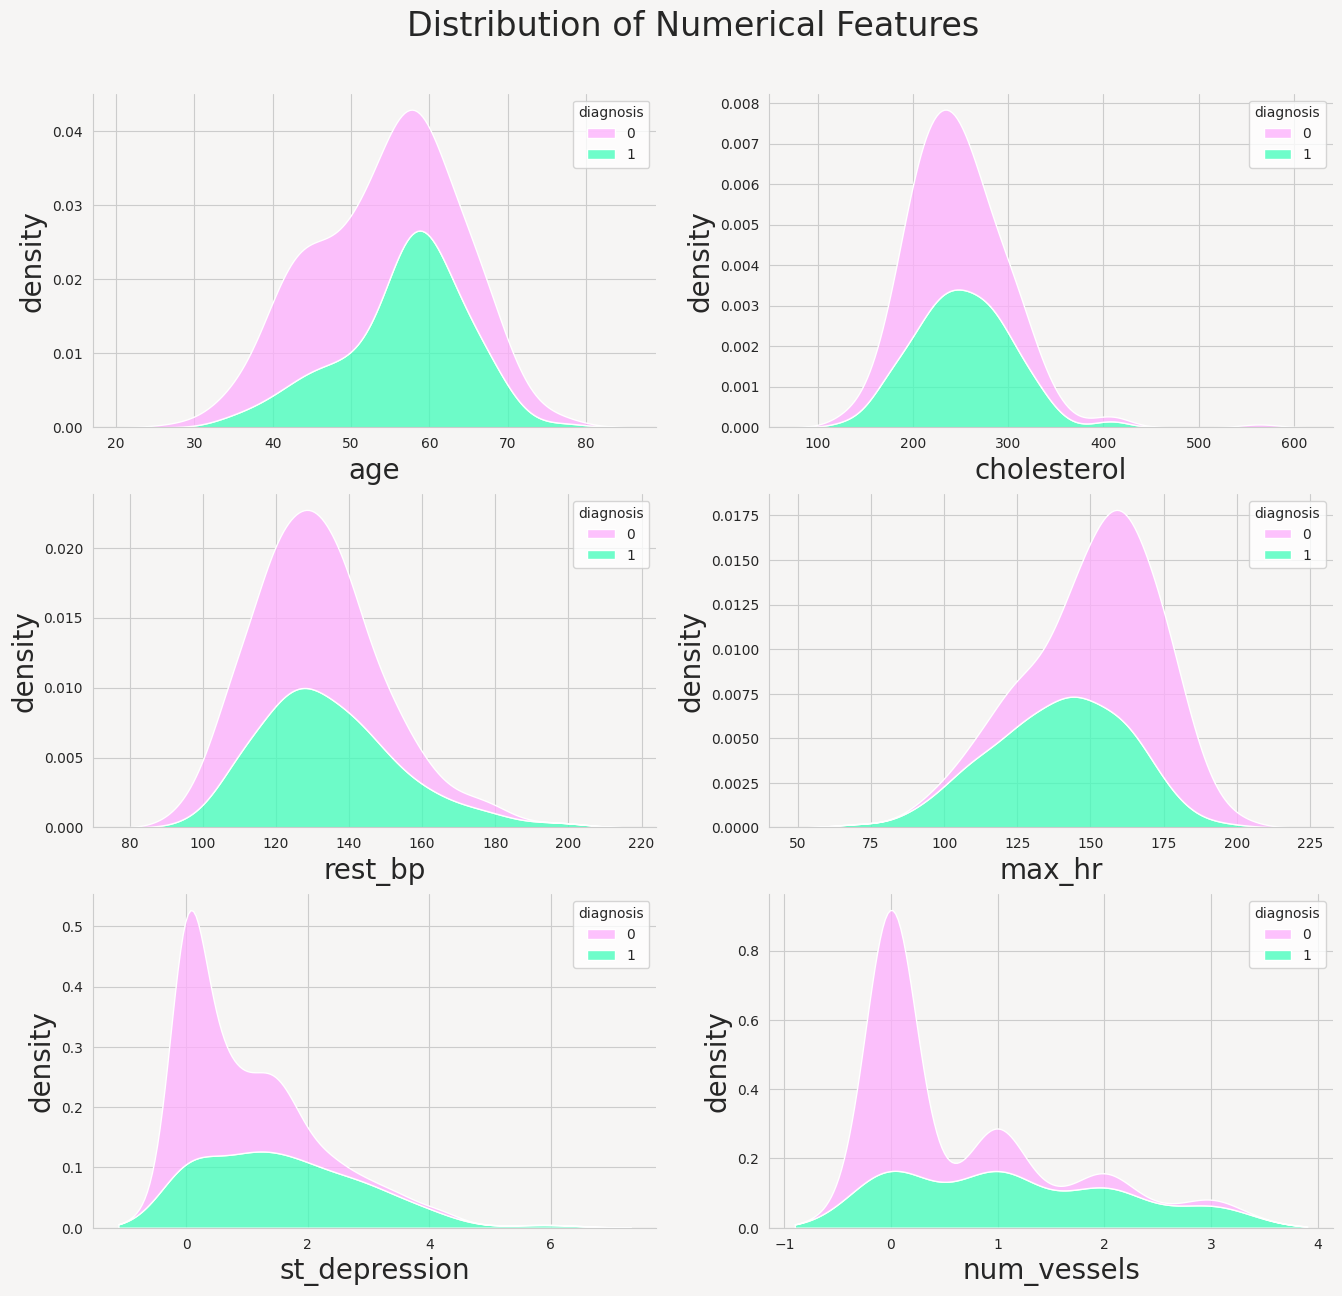

In [ ]:
#Distribution of Numerical Features

L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    ax = sns.kdeplot(data=data, x=col, hue="diagnosis", multiple="stack", palette=mypal[1::4])
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="diagnosis", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);

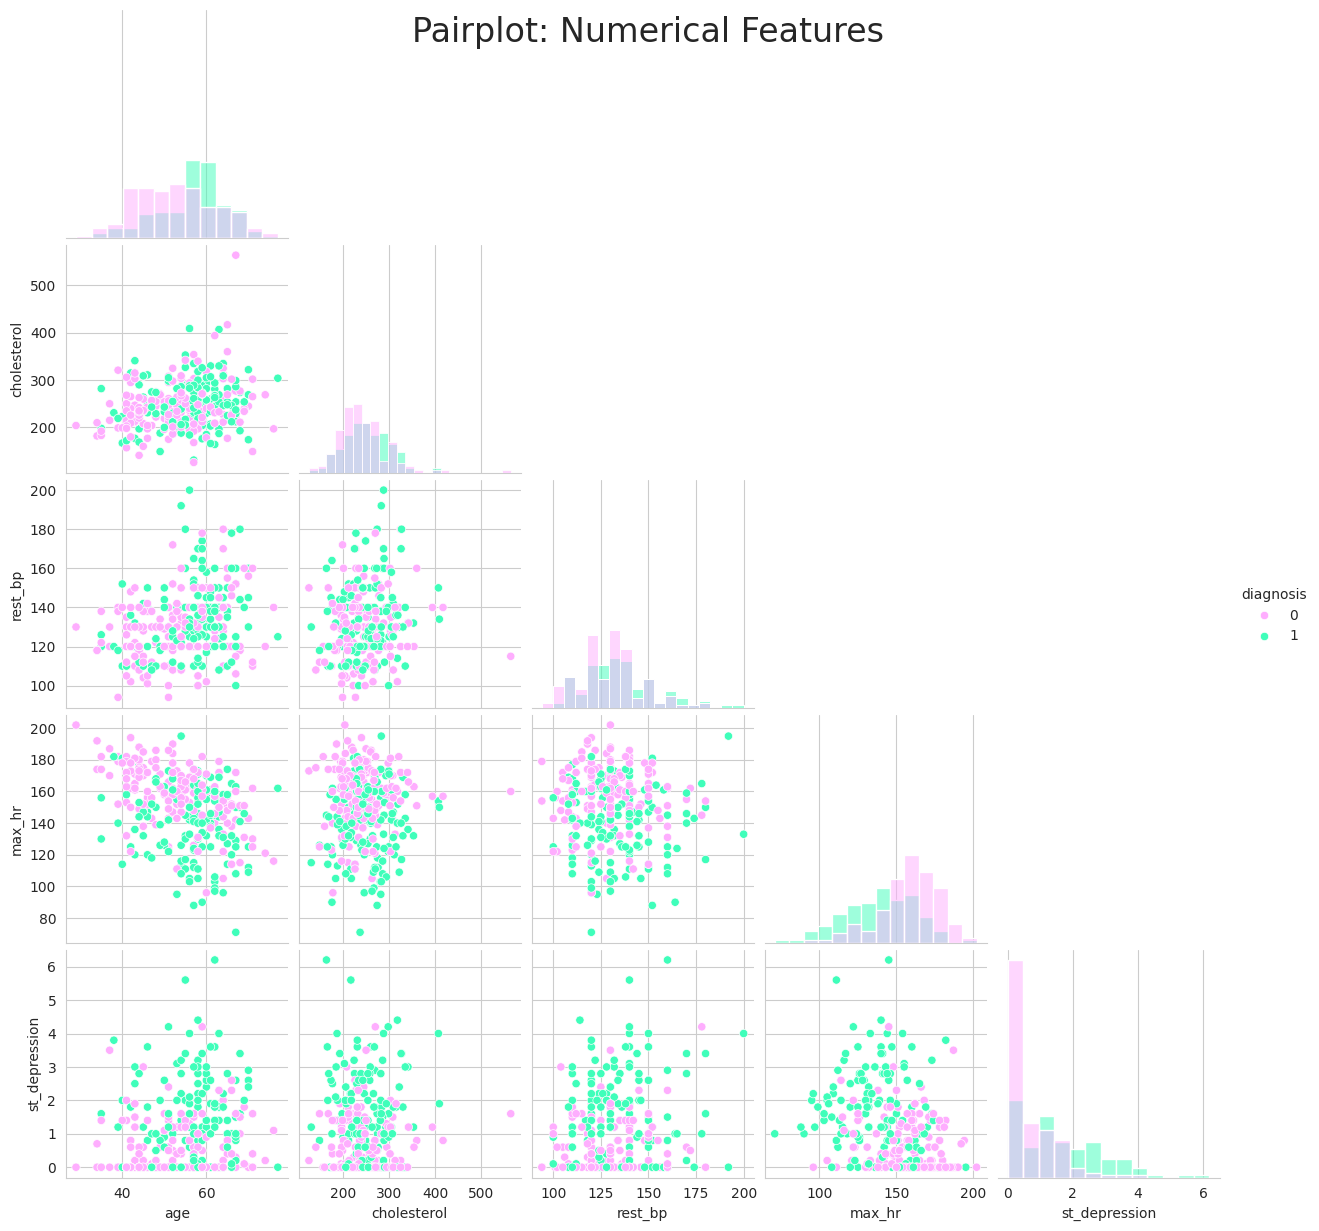

In [ ]:
# Pair plot
_ = ['age', 'cholesterol', 'rest_bp', 'max_hr', 'st_depression', 'diagnosis']
data_ = data[_]
g = sns.pairplot(data_, hue="diagnosis", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

In the above cluster of charts, you can see the plotting differenciation and their comparision with other attributes like Age, Cholesterol, Resting Blood Pressure, Maximum Heart Rate reached, ST Depression with either the person is suffering from Heart didease or not differenciated with colour.

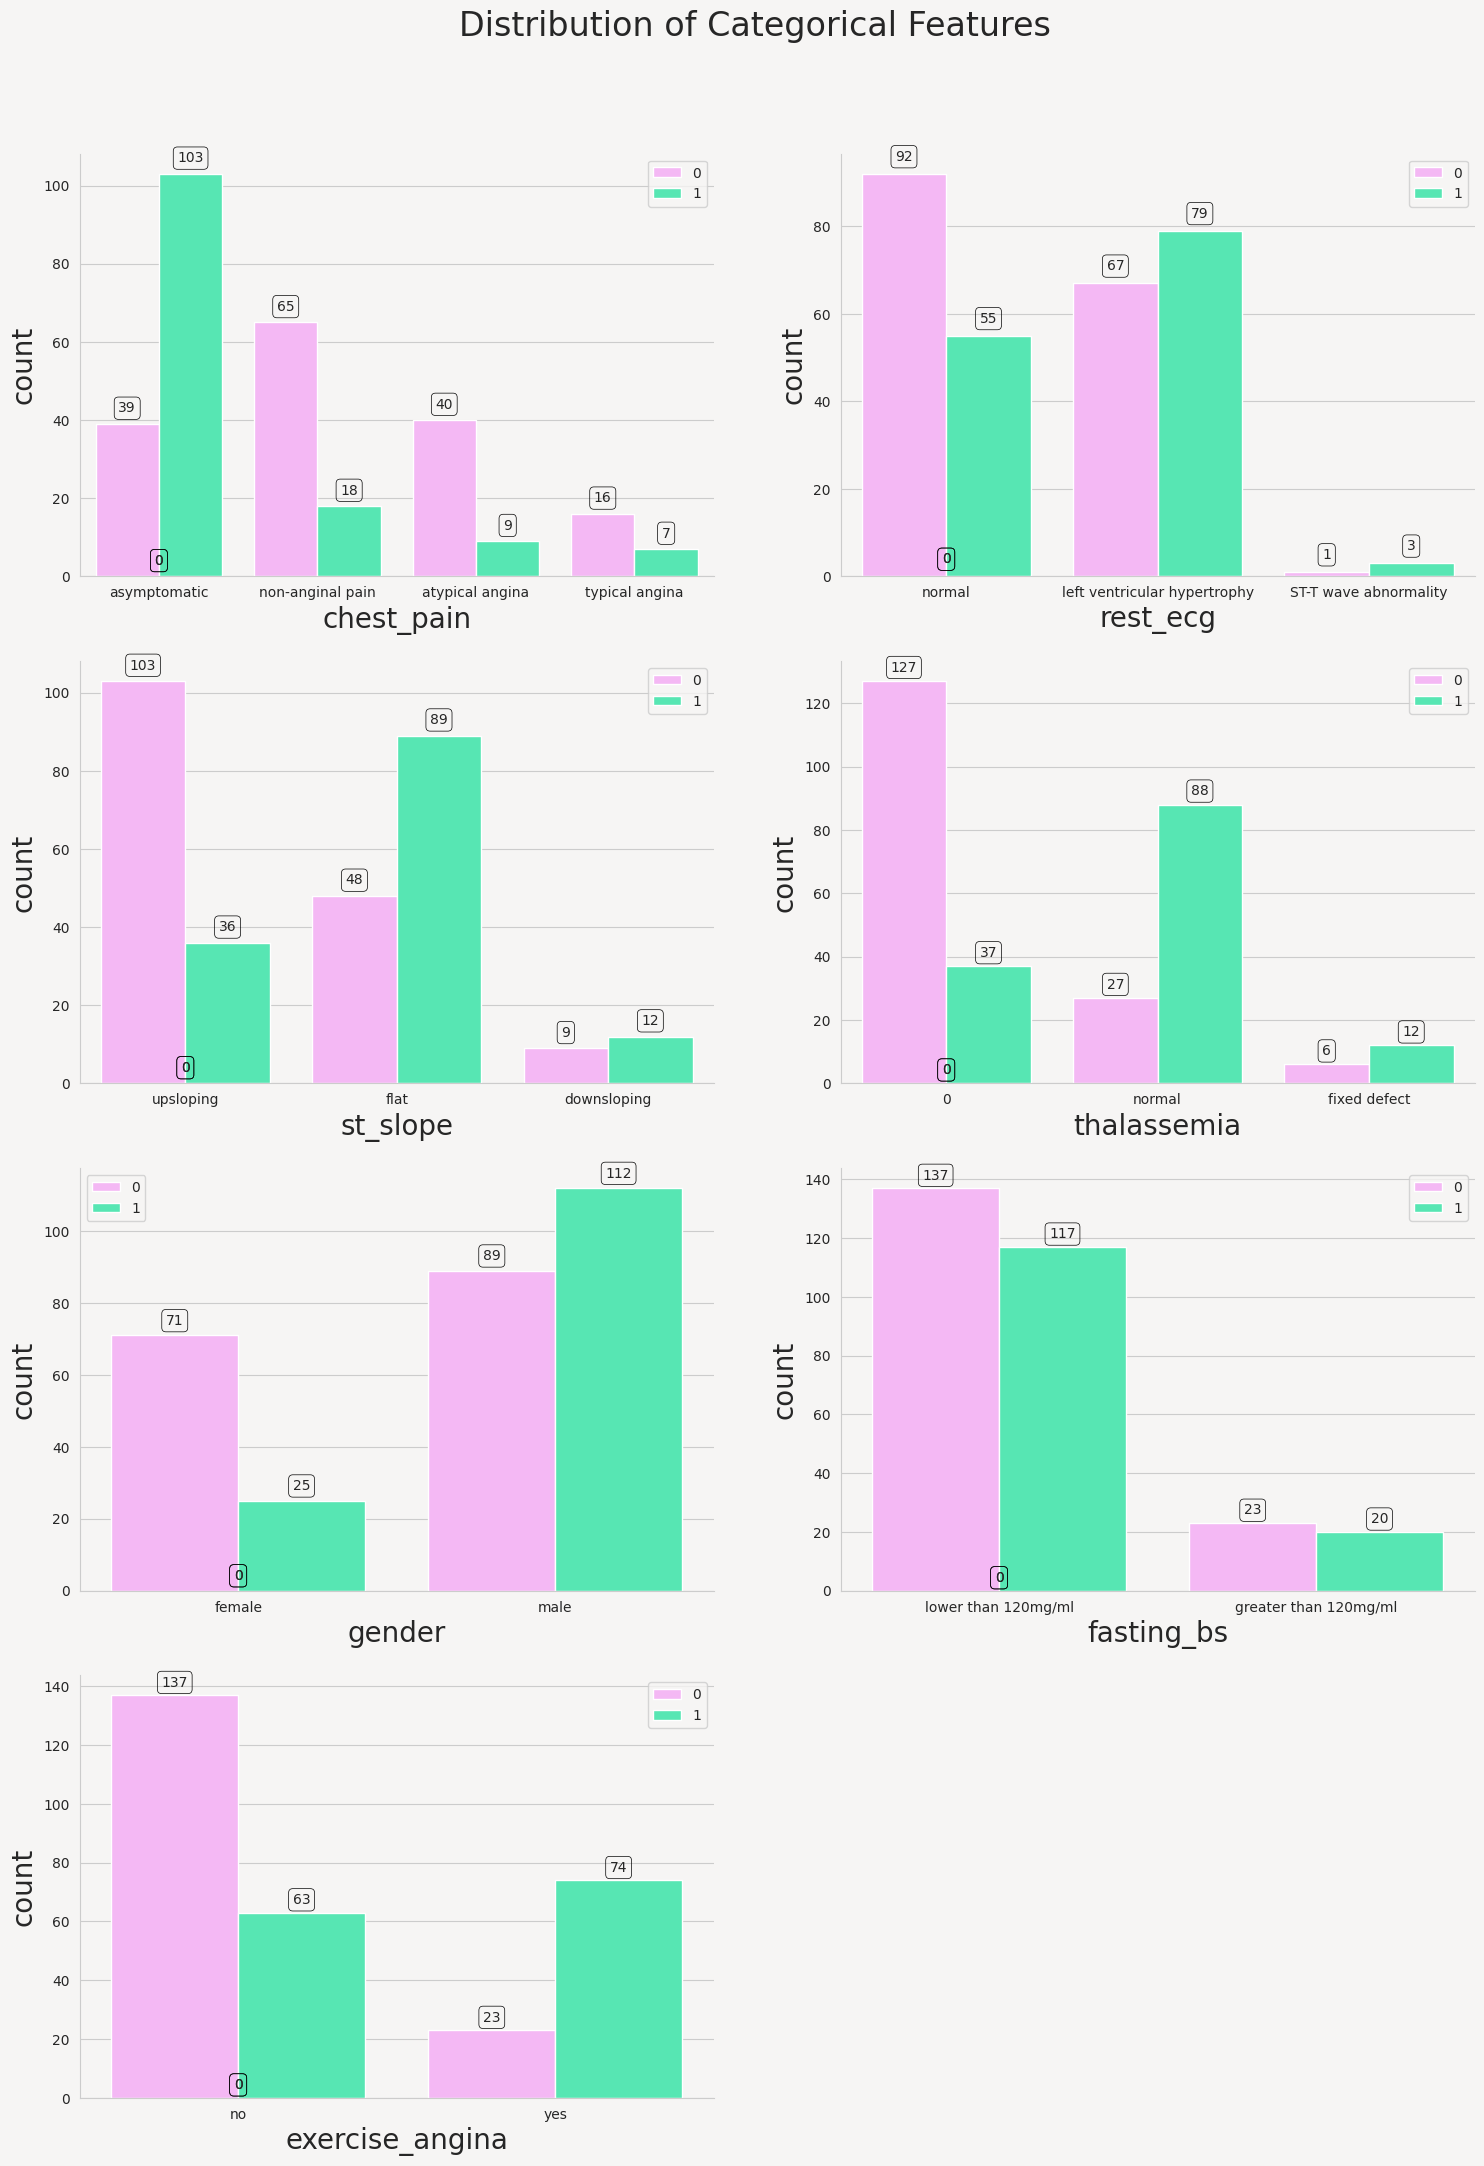

In [ ]:
#'Distribution of Categorical Features
def count_plot(data, cat_feats):
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="diagnosis", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

In [12]:
#Histogram
import altair as alt
chart = alt.Chart(data).mark_bar().encode(x='age', y='count()').properties(width=600)
chart


alt.Chart(...)



> **Scatter** **Plot**



In [13]:
#scatter plot

import altair as alt
chart = alt.Chart(data).mark_circle().encode(
    x='age',
    y='cholesterol',
    color='diagnosis'
).interactive()
chart


alt.Chart(...)

From the above Scatter chart, you can find out the age-wise grouping of people either suffering from heart disease or not which is differenciated with colour, against rate of cholesterol.

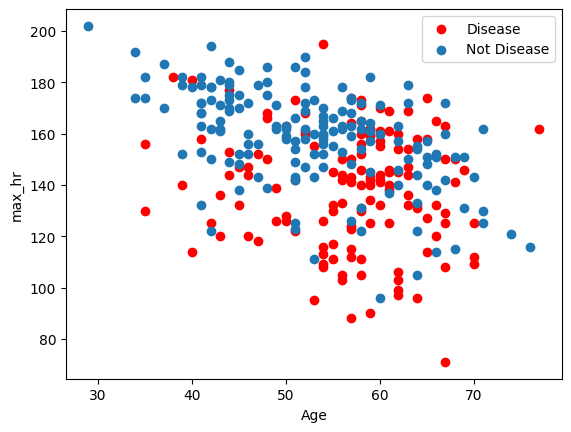

In [14]:
plt.scatter(x=data.age[data.diagnosis==1], y=data.max_hr[(data.diagnosis==1)], c="red")
plt.scatter(x=data.age[data.diagnosis==0], y=data.max_hr[(data.diagnosis==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("max_hr")
plt.show()


From the above Scatter chart, you can find out the age-wise grouping of people either suffering from heart disease or not which is differenciated with colour, against maximum heart rate.

**3D Graph**



<bound method _AxesBase.set_ylabel of <Axes3D: xlabel='Age'>>

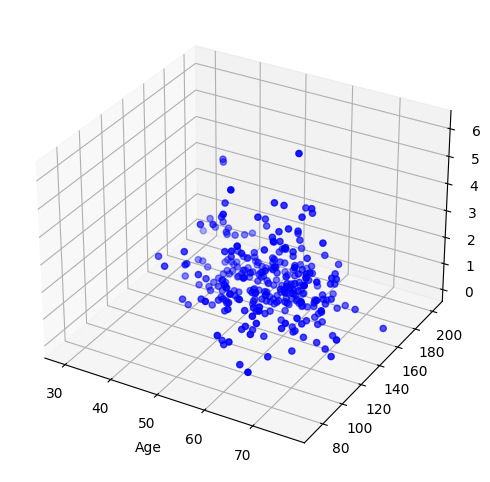

In [ ]:
#3d plot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract data from DataFrame
x = data['age']
y = data['max_hr']
z = data['st_depression']

# Plot the data
ax.scatter(x, y, z, c='blue', marker='o')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel

From the above 3D chart, you can find out the age-wise grouping of people either suffering from heart disease or not which is differenciated with colour, against maximum heart rate & ST depression.


> **KDE**



Based on the context provided, I don't see a graph directly, but I assume you're referring to the list of numbers which could represent the y-values of a graph, with the corresponding x-values being 1 to 18 in order. I will analyze this data as if it were a graph.

Here is a simple analysis:

The age values (indicated by "Age" in the list) are 30, 40, 70, 10, and 9.
The lowest value in the list is 1, and the highest value is 200.
Most of the numbers in the list fall between 50 and 140.
There seems to be a slight downward trend in the list from the beginning to the end, but there are a few jumps (60, 100, then 70) which violate this trend.

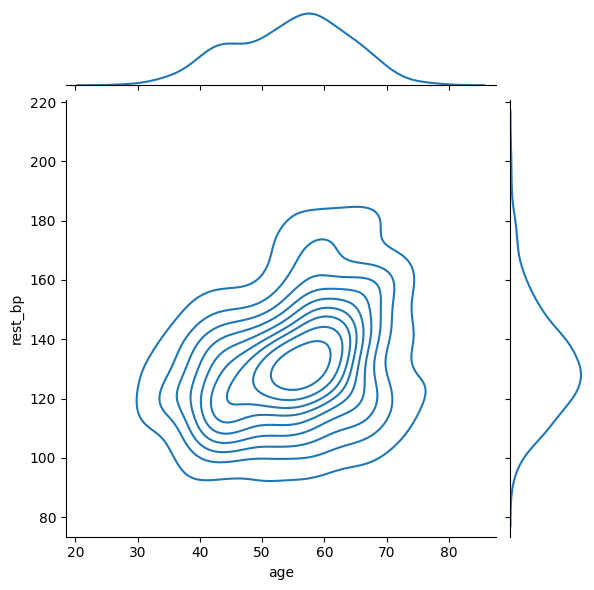

In [ ]:
# kde (might get deleted)

import seaborn as sns

jointplot = sns.jointplot
jointplot(data=data, x = 'age', y = 'rest_bp', kind = "kde")

From the above KDE chart, you can find out the age-wise grouping of people against Resting Blood Pressure.

Correlation



In [ ]:
#correlation matrix
data.corr()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
rest_bp,1.000000,-0.036980,0.130612,0.290476,0.180860,-0.049108,0.066691,-0.066340,0.121172,0.131536,0.191243,0.149242,0.097954,0.153490
chest_pain,-0.036980,1.000000,0.266275,0.110471,-0.057663,-0.339308,0.377525,0.008908,0.151079,0.072088,0.203244,0.063905,0.235644,0.408945
thalassemia,0.130612,0.266275,1.000000,0.120795,0.051038,-0.258386,0.323268,0.370556,0.260096,0.023441,0.336809,0.013612,0.248825,0.520516
age,0.290476,0.110471,0.120795,1.000000,0.132062,-0.394563,0.096489,-0.092399,0.159405,0.202644,0.197123,0.149917,0.362210,0.227075
fasting_bs,0.180860,-0.057663,0.051038,0.132062,1.000000,-0.007842,-0.000893,0.038850,0.047819,0.012708,0.008311,0.068831,0.152086,0.003167
max_hr,-0.049108,-0.339308,-0.258386,-0.394563,-0.007842,1.000000,-0.384368,-0.060496,-0.389307,-0.000075,-0.347640,-0.072290,-0.268727,-0.423817
exercise_angina,0.066691,0.377525,0.323268,0.096489,-0.000893,-0.384368,1.000000,0.143581,0.250572,0.059339,0.289310,0.081874,0.148232,0.421355
gender,-0.066340,0.008908,0.370556,-0.092399,0.038850,-0.060496,0.143581,1.000000,0.033345,-0.198089,0.106567,0.033897,0.091925,0.278467
st_slope,0.121172,0.151079,0.260096,0.159405,0.047819,-0.389307,0.250572,0.033345,1.000000,-0.009215,0.579037,0.135141,0.109761,0.333049
cholesterol,0.131536,0.072088,0.023441,0.202644,0.012708,-0.000075,0.059339,-0.198089,-0.009215,1.000000,0.038596,0.165046,0.115945,0.080285


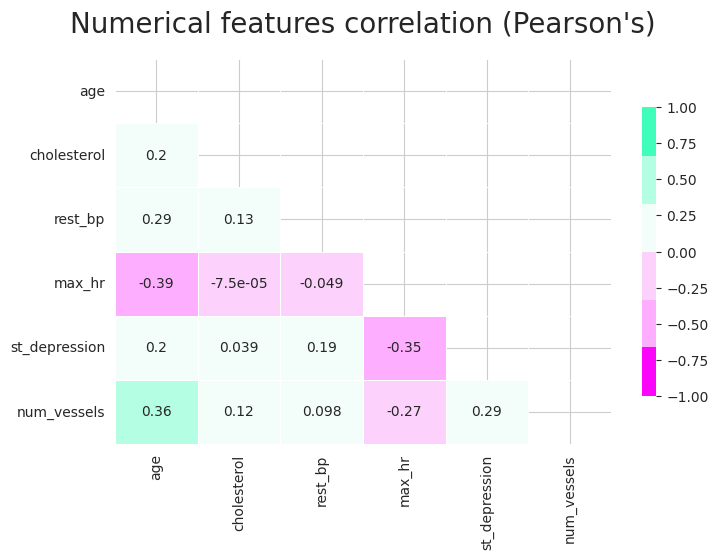

In [ ]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

• Correlation Heatmap


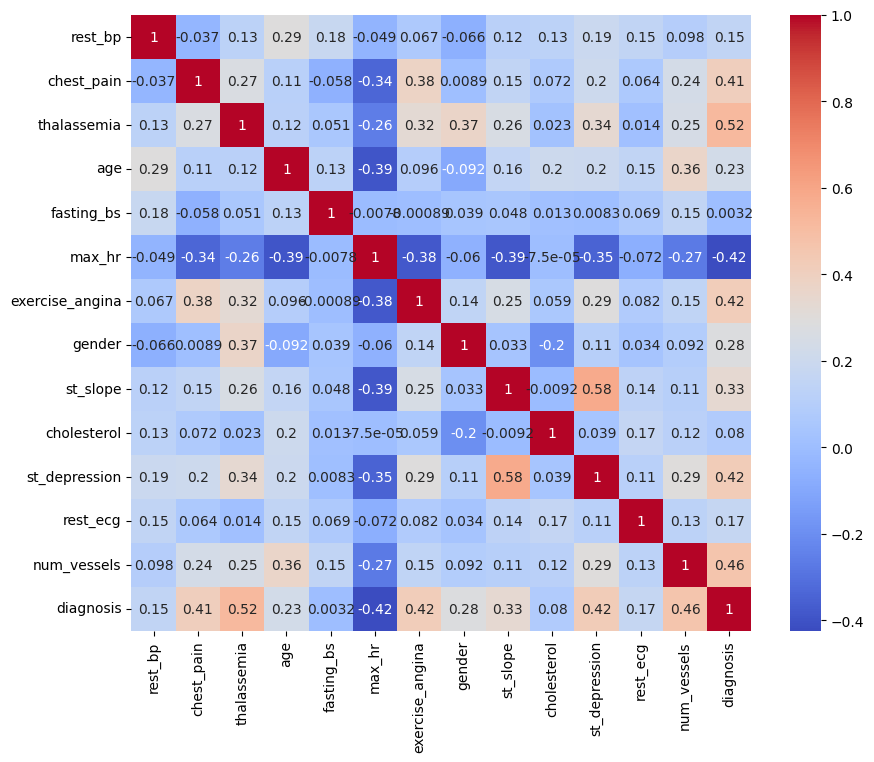

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# **3.1 Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
df = pd.read_csv ('/content/heart_data.csv')
# Assuming data is loaded into a DataFrame called df
X = df[['chest_pain', 'st_depression', 'rest_bp', 'thalassemia']]
Y = df['age']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting on the test set
Y_pred = model.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE of the baseline model:", rmse)

RMSE of the baseline model: 9.249749297521046


In [ ]:
# Have to add more prediction